In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data=pd.read_csv("FullyCleant.csv",index_col=False)

In [20]:
data.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)

In [21]:
data.head()

,assists,damageDealt,headshotKills,heals,killPlace,kills,maxPlace,winPlacePerc,playersjoined,playersJoined,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0.00,0,0,60,0,28,0.4444,96,96,...,0,0,0,0,0,0,0,0,0,1
1,0,91.47,0,0,57,0,26,0.6400,91,91,...,0,0,0,0,0,0,0,0,0,1
2,1,68.00,0,0,47,0,50,0.7755,98,98,...,0,0,0,0,0,0,0,0,0,0
3,0,32.90,0,0,75,0,31,0.1667,91,91,...,0,0,0,0,0,0,0,0,0,1
4,0,100.00,0,0,45,1,97,0.1875,97,97,...,0,0,0,0,0,0,0,1,0,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   assists                     100000 non-null  int64  
 1   damageDealt                 100000 non-null  float64
 2   headshotKills               100000 non-null  int64  
 3   heals                       100000 non-null  int64  
 4   killPlace                   100000 non-null  int64  
 5   kills                       100000 non-null  int64  
 6   maxPlace                    100000 non-null  int64  
 7   winPlacePerc                100000 non-null  float64
 8   playersjoined               100000 non-null  int64  
 9   playersJoined               100000 non-null  int64  
 10  healsandboosts              100000 non-null  int64  
 11  totalDistance               100000 non-null  float64
 12  killsWithoutMoving          100000 non-null  bool   
 13  matchType_crash

In [123]:
data.columns

Index(['assists', 'damageDealt', 'headshotKills', 'heals', 'killPlace',
       'kills', 'maxPlace', 'winPlacePerc', 'playersjoined', 'playersJoined',
       'healsandboosts', 'totalDistance', 'killsWithoutMoving',
       'matchType_crashtpp', 'matchType_duo', 'matchType_duo-fpp',
       'matchType_flarefpp', 'matchType_flaretpp', 'matchType_normal-duo',
       'matchType_normal-duo-fpp', 'matchType_normal-solo',
       'matchType_normal-solo-fpp', 'matchType_normal-squad',
       'matchType_normal-squad-fpp', 'matchType_solo', 'matchType_solo-fpp',
       'matchType_squad', 'matchType_squad-fpp'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split

In [135]:
X=data.drop(["winPlacePerc"],axis=1)
y=data["winPlacePerc"]

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
model=RandomForestRegressor()

In [138]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [139]:
predictions=model.predict(X_test)

In [38]:
from sklearn import metrics

In [130]:
print(metrics.mean_absolute_error(y_test,predictions))

0.08601263651118146


In [131]:
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

0.12347990156099158


In [132]:
print(metrics.mean_squared_error(y_test,predictions))

0.01524728608951217


In [52]:
predictions[1]

0.1072150000000001

In [119]:
predictions

array([7.04839e-01, 1.07215e-01, 9.42740e-01, ..., 2.38619e-01,
       3.70000e-04, 2.13460e-01])

In [122]:
np.mean(predictions)

0.47276287316541366

In [121]:
np.mean(y_test)

0.473197772727272

In [60]:
type(predictions)

numpy.ndarray

In [79]:
type(y_test)

pandas.core.series.Series

In [77]:
predictions[0:10]

array([0.704839  , 0.107215  , 0.94274   , 0.971415  , 0.554247  ,
       0.861382  , 0.42768   , 0.7657    , 0.579602  , 0.35635675])

In [80]:
np.array(y_test)

array([0.5567, 0.1224, 1.    , ..., 0.2   , 0.    , 0.1481])

In [90]:
predictions

array([7.04839e-01, 1.07215e-01, 9.42740e-01, ..., 2.38619e-01,
       3.70000e-04, 2.13460e-01])

In [99]:
df=pd.DataFrame([np.array(y_test).transpose(),predictions])

[]

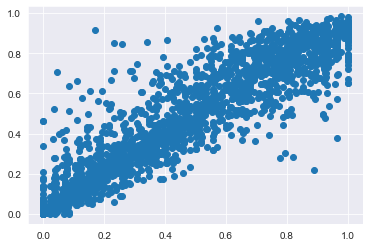

In [133]:
ax=plt.axes()
ax.scatter(x=y_test[0:2000],y=predictions[0:2000])
ax.plot()

In [140]:
print(metrics.r2_score(y_test,predictions))

0.9039382622603946
